In [5]:

#Importing libararies
%matplotlib inline
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,10)
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as Sb
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score , classification_report, confusion_matrix
import warnings
import math
import random
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv("C:\\Surbhi\\Applied ML\\sgemm_product_dataset\\sgemm_product.csv")
print(df.shape)
df.head()

(241600, 18)


,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81


In [7]:
# Code to find if there is any missing values
df.isnull().sum()

MWG          0
NWG          0
KWG          0
MDIMC        0
NDIMC        0
MDIMA        0
NDIMB        0
KWI          0
VWM          0
VWN          0
STRM         0
STRN         0
SA           0
SB           0
Run1 (ms)    0
Run2 (ms)    0
Run3 (ms)    0
Run4 (ms)    0
dtype: int64

In [8]:
df["average_run"] = df.iloc[:,14:].mean(axis = 1)
df.head()
print(df.shape)

(241600, 19)


In [9]:
#Taking log of the Average run times
df["log_avg_run"] = np.log(df.average_run) 

In [10]:
df.drop(['Run1 (ms)', 'Run2 (ms)','Run3 (ms)', 'Run4 (ms)'], axis = 1, inplace = True)
df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,average_run,log_avg_run
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,116.3700,4.756775
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.7050,4.365707
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,80.5650,4.389064
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,86.6375,4.461733
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,118.6625,4.776283


# Experiment 1

In [11]:
#Dropping the Average run column
df.drop(['average_run'], axis = 1, inplace = True)

In [12]:
sc_data = StandardScaler()
df = sc_data.fit_transform(df)
df = pd.DataFrame(df)
df.columns = ['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI',
       'VWM', 'VWN', 'STRM', 'STRN', 'SA', 'SB', 'log_avg_run']
df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,log_avg_run
0,-1.516757,-1.516757,-1.210997,-0.753894,-0.753894,-0.998054,-0.998054,-1.0,-0.741449,-0.741449,-1.0,-1.0,-1.0,-1.0,0.118479
1,-1.516757,-1.516757,-1.210997,-0.753894,-0.753894,-0.998054,-0.998054,-1.0,-0.741449,-0.741449,-1.0,-1.0,-1.0,1.0,-0.228050
2,-1.516757,-1.516757,-1.210997,-0.753894,-0.753894,-0.998054,-0.998054,-1.0,-0.741449,-0.741449,-1.0,-1.0,1.0,-1.0,-0.207353
3,-1.516757,-1.516757,-1.210997,-0.753894,-0.753894,-0.998054,-0.998054,-1.0,-0.741449,-0.741449,-1.0,-1.0,1.0,1.0,-0.142961
4,-1.516757,-1.516757,-1.210997,-0.753894,-0.753894,-0.998054,-0.998054,-1.0,-0.741449,-0.741449,-1.0,1.0,-1.0,-1.0,0.135766


In [13]:
#Conversion to matrices
X = df.iloc[:,0:14]
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)

Y = df.iloc[:,14:].values 
beta = np.zeros([1,15])

(241600, 15)

In [14]:
# Splitting the data into training and test set
X_train_1,X_test_1,y_train_1,y_test_1 = train_test_split(X,Y, test_size = 0.3,random_state = 0)

In [18]:
# Computation of cost
def calculateCost(X,Y,beta):
    tsum = np.power(((X @ beta.T)-Y),2)
    InitialCost = np.sum(tsum)/(2 * len(X))
    return InitialCost

In [19]:
#Compute cost with all Betas as zeroes
InitialCost = calculateCost(X, Y, beta)
print(InitialCost)

0.5000000000000001


In [23]:
def gradientDescent(X,Y,beta,iters,alpha):
    cost = np.zeros(iters)
    for i in range(iters):
        beta = beta - (alpha/len(X)) * np.sum(X * (X @ beta.T - Y), axis=0)
        cost[i] = calculateCost(X, Y, beta)
    
    return beta,cost

In [91]:
#Implement batch gradient descent with convergence threshold as input
def gradientDescentThresh(X,Y,beta,alpha,i,iters=1000):
    cost = []
    diff = 1
    convg = 0
    while diff > thresh:
        beta = beta - (alpha/len(X)) * np.sum(X * (X @ beta.T - Y), axis=0)
        cost.append(calculateCost(X, Y, beta))
        if len(cost)==1:
            diff = cost[0]
        else:
            diff = abs(cost[-1] - cost[-2])
            if diff <= thresh:
                convg = len(cost)
    return beta,cost,convg

In [28]:
def plotResults(X,Y,X_test,Y_test,beta,iters,alpha):
    beta_c,cost_c = gradientDescent(X,Y,beta,iters,alpha)

    #print("The value of cost function converges at:", convg_cal)
    
    print("The beta values:",beta_c)
    print("The cost function value:", cost_c[-1])
   
    Y_hat_train = X.dot(beta_c.T)
    Y_hat_test = X_test.dot(beta_c.T)
   
    #MSE Calculation for training dataset
    MSE_train = (np.sum((Y - Y_hat_train) ** 2) / len(Y));
    print("Train data MSE:", MSE_train)
    
    #MSE Calculation for test dataset
    MSE_test = (np.sum((Y_test - Y_hat_test) ** 2) / len(Y_test));
    print("Test data MSE:", MSE_test)

    plt.plot(cost_c) 
    plt.xlabel("Number of iterations") 
    plt.ylabel("Cost") 
    plt.title("Cost Converging wrt Iterations")
    plt.show()

The beta values: [[ 0.00028654  0.04377475  0.03296393 -0.00150873 -0.02435863 -0.02348476
  -0.00211047 -0.0029404  -0.00086463  0.01924638  0.01307966 -0.00575309
  -0.00062398 -0.00778665 -0.00208716]]
The cost function value: 0.45318816271001255
Train data MSE: 0.9063763254200251
Test data MSE: 0.8994117237966124


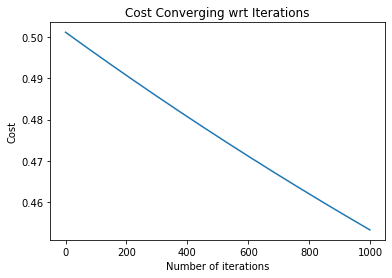

In [29]:
#alpha = 0.0001
plotResults(X_train_1,y_train_1,X_test_1,y_test_1,beta,1000,0.0001)

The beta values: [[ 0.00183939  0.28533441  0.2182029   0.00772861 -0.18008307 -0.17334639
  -0.0059886  -0.01079932 -0.00601136  0.08171182  0.05000378 -0.03804811
  -0.00426042 -0.05211287 -0.01357392]]
The cost function value: 0.2765918882249232
Train data MSE: 0.5531837764498464
Test data MSE: 0.5526527125212528


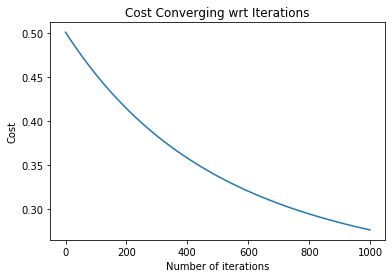

In [30]:
#alpha = 0.001
plotResults(X_train_1,y_train_1,X_test_1,y_test_1,beta,1000,0.001)

The beta values: [[ 2.34770398e-03  5.01846819e-01  3.95894526e-01  8.66362932e-02
  -3.95055803e-01 -3.79943768e-01  1.16258605e-03 -1.79724275e-04
  -1.02540184e-02 -1.33575010e-02 -3.95193931e-02 -5.93615137e-02
  -7.41656506e-03 -8.36603149e-02 -2.08613976e-02]]
The cost function value: 0.21914136048895666
Train data MSE: 0.4382827209779133
Test data MSE: 0.44003561032691835


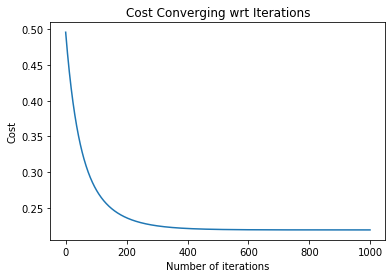

In [31]:
#alpha = 0.01
plotResults(X_train_1,y_train_1,X_test_1,y_test_1,beta,1000,0.01)

The beta values: [[ 2.33948332e-03  5.03317841e-01  3.97156081e-01  8.75300622e-02
  -3.96713438e-01 -3.81541181e-01  1.01563784e-03 -1.89404510e-04
  -1.02619197e-02 -1.48924740e-02 -4.08389388e-02 -5.93508763e-02
  -7.42694707e-03 -8.36775653e-02 -2.08593540e-02]]
The cost function value: 0.21913770667625232
Train data MSE: 0.43827541335250464
Test data MSE: 0.44003368811490734


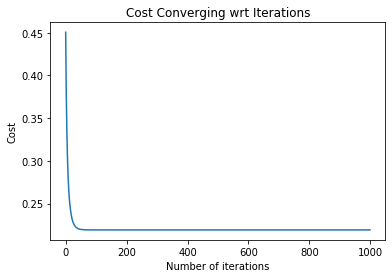

In [32]:
#alpha = 0.1
plotResults(X_train_1,y_train_1,X_test_1,y_test_1,beta,1000,0.1)

In [281]:
# defining feature matrix(X) and response vector(y) 
X = df.iloc[:, 0:14]
y = df["log_avg_run"]
  
# splitting X and y into training and testing sets 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=1) 
  
# create linear regression object 
reg = LinearRegression() 
  
# train the model using the training sets 
reg.fit(X_train, y_train) 
  
# regression coefficients 
print('Coefficients: \n', reg.coef_) 

Coefficients: 
 [ 0.50200964  0.39852238  0.08612254 -0.39850056 -0.38287982  0.0030769
  0.0006322  -0.00864278 -0.01585373 -0.04094683 -0.0601491  -0.00638996
 -0.08422928 -0.02067484]


In [ ]:
#set hyper parameters
alpha = [0.0001,0.001,0.05,0.01,0.1] #learning rate
iters = 50000 #no.of iterations
#threshold = [0.00001,0.000015,0.00002,0.000025]

finalCost_train = []
finalCost_test = []
for i in alpha:
    g,cost = gradientDescent(X,Y,beta,iters,i)
    finalCost_train.append(cost[-1]) 
    finalCost_test.append(calculateCost(X_test,y_test,g))

fig , ax = plt.subplots()
ax.plot(finalCost_train,alpha)
ax.set_xlabel('Cost')  
ax.set_ylabel('Alpha')  
ax.set_title('cost vs. Training set Alpha')  

fig , ax = plt.subplots()
ax.plot(finalCost_test,alpha)
ax.set_xlabel('Cost')  
ax.set_ylabel('Alpha')  
ax.set_title('cost vs. Test set Alpha')  

# Experiment 2

In [93]:
conv_th = [0.0001,0.00001,0.000001,0.0000001,0.00000001,0.0000000001]
MSE_test = []
MSE_train = []
GD_iters = []
alpha = 0.01
for i in conv_th:
    beta_c,cost_c,convg_c = gradientDescentThresh(X,Y,beta,alpha,i,iters)
    
    Y_hat_train = X.dot(beta_c.T)
    Y_hat_test = X_test.dot(beta_c.T)
   
    #MSE Calculation for training dataset
    MSE_train_a = (np.sum((Y - Y_hat_train) ** 2) / len(Y));
    print("Train data MSE:", MSE_train)
    
    #MSE Calculation for test dataset
    MSE_test_a = (np.sum((Y_test - Y_hat_test) ** 2) / len(Y_test));
    print("Test data MSE:", MSE_test)
    
    MSE_test.append(MSE_test_a)
    MSE_train.append(MSE_train_a)
    GD_iters.append(convg_c)

ValueError: Dot product shape mismatch, (241600, 14) vs (15, 1)

In [42]:
#Implement batch gradient descent with convergence threshold as input
#Calculate Test and Train dataset MSE at each iteration
def gradientDescentMSE(X,Y,X_test,Y_test,beta,alpha,thresh,iters=5000):
    Test_error = []
    Train_error = []
    cost = []
    diff = 1
    convg = 0
    while diff > thresh:
        beta = beta - (alpha/len(X)) * np.sum(X * (X @ beta.T - Y), axis=0)
        cost.append(calculateCost(X, Y, beta))
        
        Y_hat_train = X.dot(beta.T)
        Y_hat_test = X_test.dot(beta.T)
        
        #MSE Calculation for training dataset
        MSE_train = (np.sum((Y - Y_hat_train) ** 2) / len(Y));
        #print("Train data MSE:", MSE_train)
    
        #MSE Calculation for test dataset
        MSE_test = (np.sum((Y_test - Y_hat_test) ** 2) / len(Y_test));
        #print("Test data MSE:", MSE_test)
        
        Test_error.append(MSE_test)
        Train_error.append(MSE_train)
        
        if len(cost)==1:
            diff = cost[0]
        else:
            diff = abs(cost[-1] - cost[-2])
            if diff <= thresh:
                convg = len(cost)
    return Test_error,Train_error,convg

In [43]:
thresh = 0.0000001
alpha = 0.05
Test_err,Train_err,convg = gradientDescentMSE(X_train_1,y_train_1,X_test_1,y_test_1,beta,
                                                     alpha,thresh)

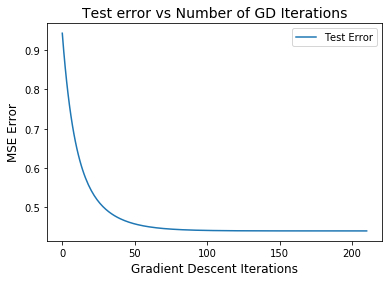

In [48]:
plt.plot(Test_err, label = "Test Error")
#plt.plot(Train_err, label = "Train Error")
plt.xlabel('Gradient Descent Iterations', fontsize=12)
plt.ylabel('MSE Error', fontsize=12)
plt.title('Test error vs Number of GD Iterations', fontsize=14)
plt.legend()
plt.show()

# Experiment 3

In [103]:
ls = ['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM', 'VWN', 'STRM', 'STRN', 'SA', 'SB']
rand_set = random.sample(ls, 8)

In [104]:
ls_rand = rand_set + ['log_avg_run']
ls_rand

['SA', 'STRM', 'MDIMC', 'MDIMA', 'KWI', 'KWG', 'SB', 'NDIMC', 'log_avg_run']

In [105]:
#Normalize using StandardScaler function
sc_data = StandardScaler()
Lin_rand = df[ls_rand]
Lin_rand = sc_data.fit_transform(Lin_rand)
Lin_rand = pd.DataFrame(Lin_rand)
Lin_rand.columns = ls_rand
Lin_rand.head()

,SA,STRM,MDIMC,MDIMA,KWI,KWG,SB,NDIMC,log_avg_run
0,-1.0,-1.0,-0.753894,-0.998054,-1.0,-1.210997,-1.0,-0.753894,0.118479
1,-1.0,-1.0,-0.753894,-0.998054,-1.0,-1.210997,1.0,-0.753894,-0.228050
2,1.0,-1.0,-0.753894,-0.998054,-1.0,-1.210997,-1.0,-0.753894,-0.207353
3,1.0,-1.0,-0.753894,-0.998054,-1.0,-1.210997,1.0,-0.753894,-0.142961
4,-1.0,-1.0,-0.753894,-0.998054,-1.0,-1.210997,-1.0,-0.753894,0.135766


In [106]:
# Conversion to matrices
X = Lin_rand.iloc[:,0:8]
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)

Y = Lin_rand.iloc[:,8:].values 
beta = np.zeros([1,9])

In [107]:
#Splitting the data into training and test set
X_train_3,X_test_3,y_train_3,y_test_3 = train_test_split(X,Y,test_size = 0.3,random_state = 0)

The beta values: [[-25.28529831  -4.29975115  -3.00861507 -20.24637856   0.28798798
   -0.53702966   0.74777098  -1.40715595 -19.0272478 ]]
The cost function value: -9.126557300834321
Train data MSE: 1246.5816020221482
Test data MSE: 1253.8112001543357


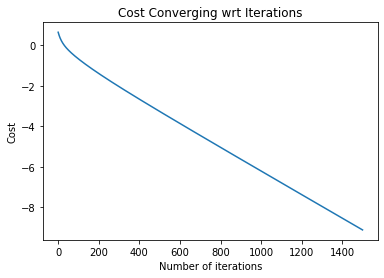

In [108]:
#alpha = 0.1
plotResults(X_train_3,y_train_3,X_test_3,y_test_3,beta,1500,0.1)

# Experiment 4

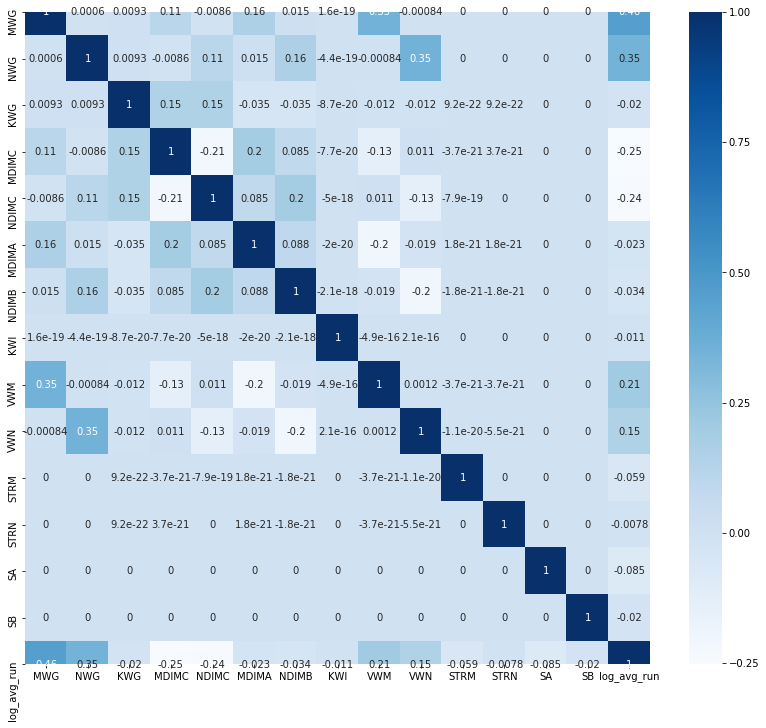

In [95]:
#Using Pearson Correlation
plt.figure(figsize=(14,12))
cor = df.corr()
Sb.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

In [96]:
#Correlation with output variable
output = abs(cor["log_avg_run"])
output

# As per the below records, we can see that the least correlated variables are STRN 0.007790, KWI 0.011200, SB 0.020323, KWG 0.020358, MDIMA 0.023076 
# and NDIMB 0.033688

MWG            0.459029
NWG            0.346429
KWG            0.020358
MDIMC          0.252085
NDIMC          0.243448
MDIMA          0.023076
NDIMB          0.033688
KWI            0.011200
VWM            0.209574
VWN            0.145031
STRM           0.058792
STRN           0.007790
SA             0.084739
SB             0.020323
log_avg_run    1.000000
Name: log_avg_run, dtype: float64

In [109]:
new_lin = ['MWG', 'NWG', 'MDIMC', 'NDIMC', 'VWM', 'VWN', 'STRM', 'SA', 'log_avg_run']
new_lin

['MWG', 'NWG', 'MDIMC', 'NDIMC', 'VWM', 'VWN', 'STRM', 'SA', 'log_avg_run']

In [110]:
#Normalize using StandardScaler function
sc_data = StandardScaler()
Lin_R = df[new_lin]
Lin_R = sc_data.fit_transform(Lin_R)
Lin_R = pd.DataFrame(Lin_R)
Lin_R.columns = new_lin
Lin_R.head()

,MWG,NWG,MDIMC,NDIMC,VWM,VWN,STRM,SA,log_avg_run
0,-1.516757,-1.516757,-0.753894,-0.753894,-0.741449,-0.741449,-1.0,-1.0,0.118479
1,-1.516757,-1.516757,-0.753894,-0.753894,-0.741449,-0.741449,-1.0,-1.0,-0.228050
2,-1.516757,-1.516757,-0.753894,-0.753894,-0.741449,-0.741449,-1.0,1.0,-0.207353
3,-1.516757,-1.516757,-0.753894,-0.753894,-0.741449,-0.741449,-1.0,1.0,-0.142961
4,-1.516757,-1.516757,-0.753894,-0.753894,-0.741449,-0.741449,-1.0,-1.0,0.135766


In [111]:
# Conversion to matrices
X = Lin_R.iloc[:,0:8]
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)

Y = Lin_R.iloc[:,8:].values 
beta = np.zeros([1,9])

In [101]:
#Splitting the data into training and test set
X_train_4,X_test_4,y_train_4,y_test_4 = train_test_split(X,Y,test_size = 0.3,random_state = 0)

The beta values: [[-39.17328069  36.6206465   29.23283011 -24.96833249 -24.36803521
    8.25844903   5.48584225  -4.75780644  -6.46927934]]
The cost function value: nan
Train data MSE: 4874.674328782957
Test data MSE: 4848.488509551303


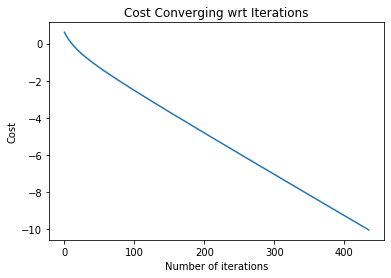

In [102]:
#alpha = 0.1
plotResults(X_train_4,y_train_4,X_test_4,y_test_4,beta,1500,0.1)

# Logistic Regression 

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [122]:
dv = pd.read_csv("C:\\Surbhi\\Applied ML\\sgemm_product_dataset\\sgemm_product.csv")

In [123]:
dv["avg_run"] = dv.iloc[:,14:].mean(axis = 1)
dv.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms),avg_run
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80,116.3700
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19,78.7050
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97,80.5650
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58,86.6375
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81,118.6625


In [124]:
#Taking log of the Average run times
dv["log_avg_run"] = np.log(dv.avg_run) 
median_run = dv['log_avg_run'].median()
dv.loc[dv['log_avg_run'] >= median_run, 'run_class'] = 1
dv.loc[dv['log_avg_run'] < median_run, 'run_class'] = 0
median_run

4.245490733029061

In [125]:
dv.drop(['Run1 (ms)', 'Run2 (ms)','Run3 (ms)', 'Run4 (ms)', 'avg_run','log_avg_run'], axis = 1, inplace = True)
dv.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,run_class
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,1.0
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,1.0
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,1.0
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,1.0
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,1.0


In [126]:
# defining feature matrix(X) and response vector(y) 
X = dv.iloc[:, 0:14]
y = dv["run_class"]
  
# splitting X and y into training and testing sets 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=10) 

from sklearn.preprocessing import StandardScaler
sc_data = StandardScaler()
X_train = sc_data.fit_transform(X_train)

In [127]:
def sigmoid(X,beta):
    z = np.exp(X @ beta.T)
    y_hat = (z/(1+z))
    return y_hat

In [128]:
def CalculateCostLog(y, y_hat):
    cost = (-1/len(y))*np.sum((y * np.log(y_hat)) + ((1 - y) * np.log(1 - y_hat)),axis=0)
    return cost

In [129]:
# gradient descent algorithm
def gradientDescentLog(X,y,beta,iters,alpha,diff=0.0000001):
    cost = np.ones(iters)
    for i in range(iters):
        beta = beta - (alpha/len(X_train)) * np.sum(X * (sigmoid(X,beta) - y), axis=0)
        cost[i] = CalculateCostLog(y, sigmoid(X,beta))
        
        if (abs((cost[i]-cost[i-1])/cost[i-1]) < diff).any():
            print("Gradient Descent algorithm converged after", i+1, "Iterations")
            break 
    
    return beta,cost

In [130]:
def logistic_regression(X, y, alpha, iters):
    n = X.shape[1]
    one_a = np.ones((X.shape[0],1))
    X = np.concatenate((one_a, X), axis = 1)
    beta = np.zeros((1,n+1))
    y = np.array(y).reshape((y.shape[0],1))
    beta, cost = gradientDescentLog(X,y,beta,iters,alpha)
    return beta

In [131]:
beta_log = logistic_regression(X_train, y_train, 0.01, 5000)

In [132]:
beta_log

array([[-0.0018761 ,  1.26881534,  0.8141489 ,  0.13484884, -0.85909199,
        -0.73107699, -0.04301586, -0.06786615, -0.02198589, -0.05959038,
        -0.12977278, -0.30983834, -0.0312735 , -0.38968715, -0.07676986]])

In [133]:
def test_log(X_test,beta):
    sc_data = StandardScaler()
    X_test = sc_data.fit_transform(X_test)

    one_a = np.ones((X_test.shape[0],1))
    X_test = np.concatenate((one_a, X_test), axis = 1)

    return sigmoid(X_test, beta)

In [134]:
y_predicted = test_log(X_test, beta_log)

In [135]:
dv_log = pd.DataFrame(y_test.values, columns=['y_actual']) 
dv_log = pd.concat([dv_log, pd.DataFrame(y_predicted)], axis=1, ignore_index=True)
dv_log.columns = ['y_actual', 'y_hat']

In [136]:
threshold = 0.5
dv_log.loc[dv_log['y_hat'] >= threshold, 'y_pred'] = 1
dv_log.loc[dv_log['y_hat'] < threshold, 'y_pred'] = 0

In [137]:
# Python script for confusion matrix creation. 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

results = confusion_matrix(dv_log['y_actual'], dv_log['y_pred']) 
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(dv_log['y_actual'], dv_log['y_pred']) )
print ('Report : ')
print (classification_report(dv_log['y_actual'], dv_log['y_pred']) )

Confusion Matrix :
[[29472  6637]
 [ 7142 29229]]
Accuracy Score : 0.8098923841059603
Report : 
              precision    recall  f1-score   support

         0.0       0.80      0.82      0.81     36109
         1.0       0.81      0.80      0.81     36371

    accuracy                           0.81     72480
   macro avg       0.81      0.81      0.81     72480
weighted avg       0.81      0.81      0.81     72480



In [138]:
#Implement batch gradient descent with convergence threshold as input
#Stopping the iterations when the threshold is achieved
def logRegGradientDescentThresh(X,Y,beta,alpha,thresh,iters=5000):
    cost = []
    diff = 1
    convg = 0
    while diff > thresh:
        beta = beta - (alpha/len(X)) * np.sum(X * (X @ beta.T - Y), axis=0)
        cost.append(calculateLogRegCost(X, Y, beta))
        if len(cost)==1:
            diff = cost[0]
        else:
            diff = abs(cost[-1] - cost[-2])
            if diff <= thresh:
                convg = len(cost)
    return beta,cost,convg

In [139]:
def logRegYPredict(X,beta,threshold):
    y_pred = sigmoid(X,beta)
    y_pred_class = np.zeros(len(y_pred))
    for i in range(len(y_pred_class)):
        if y_pred[i] < threshold:
            y_pred_class[i] = 0
        elif y_pred[i] >= threshold:
            y_pred_class[i] = 1
    return y_pred_class

In [142]:
col_list = ['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM', 'VWN', 'STRM', 'STRN', 'SA', 'SB']
f_rand = random.sample(col_list, 8)    

In [144]:
log_rand = f_rand + ['log_avg_run']
print("Random Feature List:",log_rand)
LogReg_feature = df[log_rand]

Random Feature List: ['STRN', 'KWG', 'SA', 'SB', 'NDIMC', 'MWG', 'NWG', 'VWM', 'log_avg_run']


In [145]:
X_log = LogReg_feature.iloc[:,0:8]
ones = np.ones([X_log.shape[0],1])
X_log = np.concatenate((ones,X_log),axis=1)
Y_log = LogReg_feature.iloc[:,8]
beta = np.zeros([1,9])

In [ ]:
#threshold = median
thresh = 4.243123698247448
iters = 500
alpha = 0.1

X_train_LogReg, X_test_LogReg, y_train_LogReg, y_test_LogReg, beta_strt = LogReg(thresh,'Rand')
beta_cal,cost_cal,convg_cal = logRegGradientDescent(X_train_LogReg,y_train_LogReg,beta_strt,iters,alpha)

print("The beta values are:",beta_cal)
print("The final value of cost function is:", cost_cal[-1])
print("The value of cost function converges at:", convg_cal)

In [146]:
sel_feature = ['MWG', 'NWG', 'MDIMC', 'NDIMC', 'VWM', 'VWN', 'STRM', 'SA', 'log_avg_run']
print("Selected Feature List:",sel_feature)
LogReg_feature = df[sel_feature]

Selected Feature List: ['MWG', 'NWG', 'MDIMC', 'NDIMC', 'VWM', 'VWN', 'STRM', 'SA', 'log_avg_run']


In [149]:
X_log = LogReg_feature.iloc[:,0:8]
ones = np.ones([X_log.shape[0],1])
X_log = np.concatenate((ones,X_log),axis=1)
Y_log = LogReg_feature.iloc[:,8]
beta = np.zeros([1,9])

# Logistic Regression using Skilearn

In [260]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

predicted_classes = model.predict(X_test)
accuracy = accuracy_score(y_test,predicted_classes)
parameters = model.coef_

In [261]:
accuracy

0.8100993377483444